# Analisis de Datos, conociendo el negocio.


Algunas preguntas por responder:

1. ¿Cuál fue el profit total? y ¿cuánto por mes?

2. ¿Cuál fue el Estado con mayores ingresos?

3. ¿Qué Estados dieron pérdidas?

4. ¿Cuál segmentación de negocio fue mas redituable?

5. ¿Cuáles fueron los productos más redituables?

### 1. Datos
El presente dataset fue tomado como ejemple de la web de Kaggle: https://www.kaggle.com/datasets/abiodunonadeji/united-state-superstore-sales

### 2. Características

Aquí es donde obtendrá información diferente sobre cada una de las características de sus datos.

#### Metadata

Row ID- Unique id of the row

Order ID- Customer Unique Id

Order Date- Date of order of product from the store

Ship Date- Date the product was shipped

Ship Mode- Shipping mode of product purchased by customer

Customer ID- Each customer unique id

Customer Name- Name of customer that order a product

Segment- Customer Segment

Country- Customer residence Country

City - Customer residence City

State- Customer residence State

Postal Code- Customer postal code

Region- Region of the Country where the Customer Reside

Product ID- Unique Product Identify

Category- Product Category in the store

Sub-Category- Product Subcategory in the Store

Product Name - Name of each product in the store

Sales- Sales of the product

Quantity- Quantity of product sold

Discount- Discount giving to customer

Profit- Profit/Loss incurred

### 3. Preparar el entorno de ejecución

* `Pandas` para el análisis de datos.
* `NumPy` para operaciones numéricas.
* `Matplotlib/seaborn` para trazado o visualización de datos.



#### Importo las librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvas
!pip install xlrd==2.0.1

In [2]:
df = pd.read_excel('Sample-Superstore.xls')

#### Visaulización de las primeras 5 filas

In [3]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


#### Visualizamos la forma y el tamaño del dataset

In [4]:
df.shape # 9.994 filas x 21 columnas

(9994, 21)

#### Verifico si el dataset contiene elementos nulos y los sumarizo

In [5]:
df.isnull().sum() != 0

Row ID           False
Order ID         False
Order Date       False
Ship Date        False
Ship Mode        False
Customer ID      False
Customer Name    False
Segment          False
Country          False
City             False
State            False
Postal Code      False
Region           False
Product ID       False
Category         False
Sub-Category     False
Product Name     False
Sales            False
Quantity         False
Discount         False
Profit           False
dtype: bool

#### Compruebo el tipo de datos de cada columna

In [6]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

Mediante la Estadística Descriptiva, observo que existen posibles outliers, que van a influir en nuestra métricas y visualizaciones.

In [7]:
df[['Sales', 'Profit']].describe()

,Sales,Profit
count,9994.000000,9994.000000
mean,229.858001,28.656896
std,623.245101,234.260108
min,0.444000,-6599.978000
25%,17.280000,1.728750
50%,54.490000,8.666500
75%,209.940000,29.364000
max,22638.480000,8399.976000


Cutomizo el DataFrame en pos de mis análisis posteriores

In [8]:
df['Month'] = df['Order Date'].dt.month
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10


# 1) ¿Cuál fue el profit total? 

In [9]:
profit_total = df['Profit'].sum()
profit_total

286397.0216999999

##¿Cuál fue el profit x mes?

In [10]:
profit_month = df[['Profit','Month']].groupby('Month').sum().reset_index()
profit_month = profit_month.sort_values('Month', ascending = False)
df_profit = pd.DataFrame(profit_month)
df_profit

,Month,Profit
11,12,43369.1919
10,11,35468.4265
9,10,31784.0413
8,9,36857.4753
7,8,21776.9384
6,7,13832.6648
5,6,21285.7954
4,5,22411.3078
3,4,11587.4363
2,3,28594.6872


In [11]:
x = df_profit.Month
y = df_profit.Profit
x

11    12
10    11
9     10
8      9
7      8
6      7
5      6
4      5
3      4
2      3
1      2
0      1
Name: Month, dtype: int64

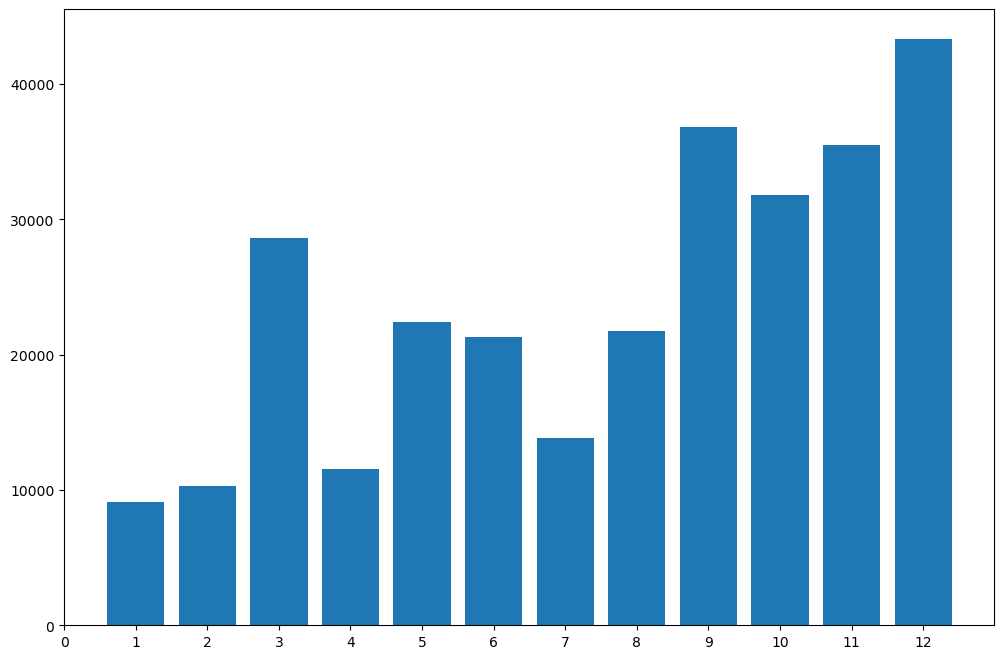

In [12]:
plt.figure(figsize=(12, 8))
plt.bar(x, y)
plt.xticks(range(0, 13))
plt.show()

# 2. ¿Cuál fue el Estado que generó mayores ingresos?


In [13]:
state = df[['Profit','State']].groupby('State').sum().reset_index()
state = state.sort_values('Profit', ascending=False)

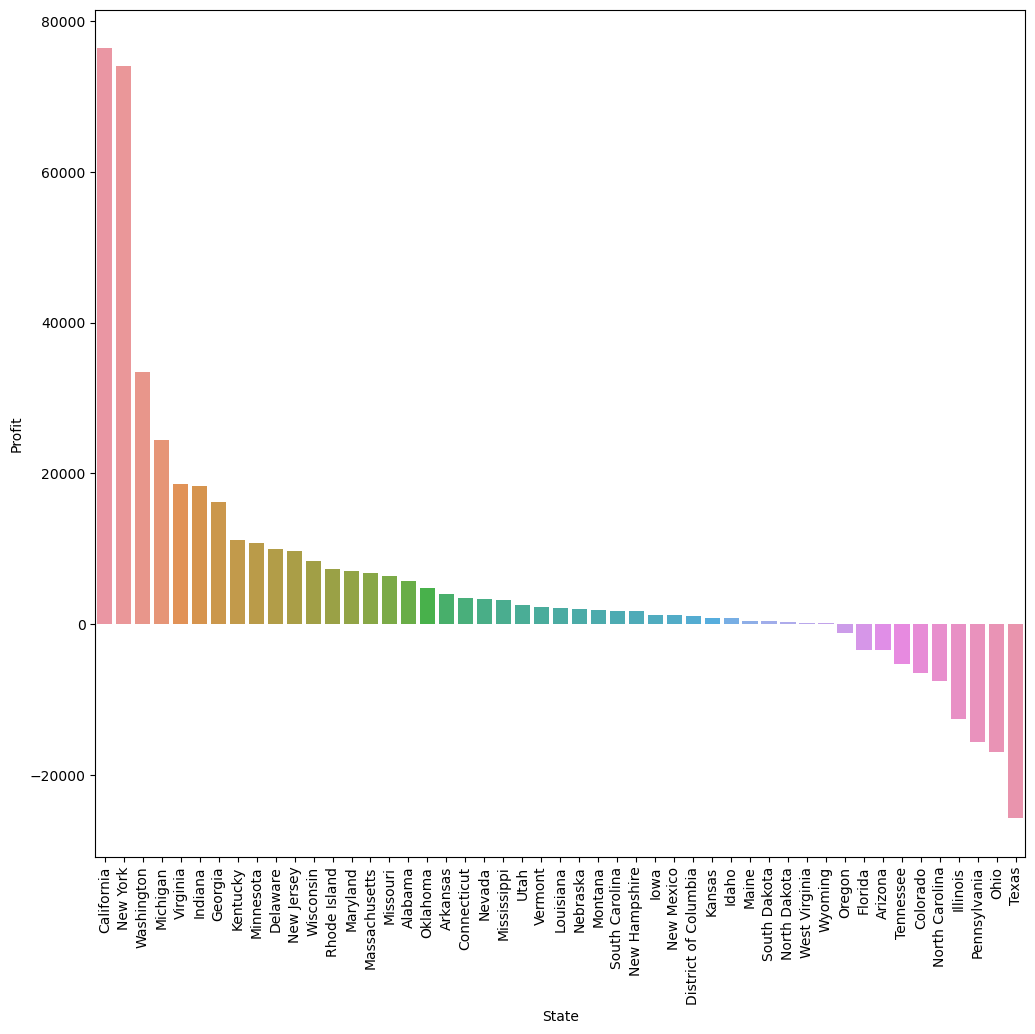

In [14]:
plt.figure(figsize=(12,11))
plt_s = sns.barplot(x=state['State'], y=state['Profit'])

for item in plt_s.get_xticklabels():
    item.set_rotation(90)

# 3. ¿Qué Estados dieron pérdidas?

In [15]:
df2 = pd.DataFrame(df, columns=('Month', 'Product ID', 'Segment', 'Category', 'Region', 'State', 'Profit')).sort_values(by='Profit', ascending=False)

In [16]:
df_loss = df.query('Profit < 0').sort_values(by='Profit')

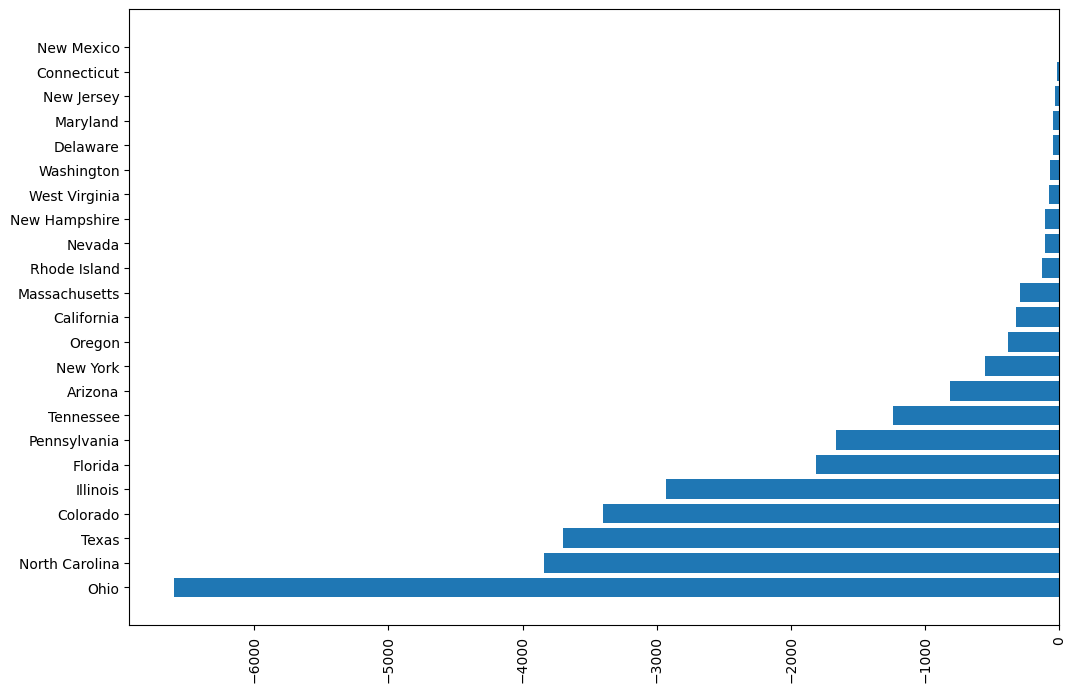

In [17]:
x = df_loss['State']
y = df_loss['Profit']
plt.figure(figsize=(12,8))
plt.xticks(rotation = 90)
plt.barh(x, y)
plt.show()

# 4. ¿Cuál segmentación de negocio fue mas redituable?

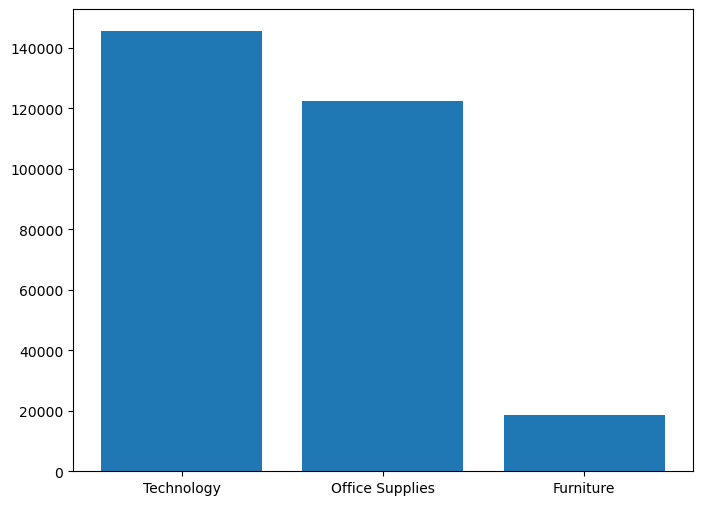

In [18]:
segment = df[['Profit','Category', 'State']].groupby('Category').sum().reset_index()
segment = segment.sort_values('Profit', ascending=False)
x = segment['Category']
y= segment['Profit']
plt.figure(figsize=(8,6))
plt.bar(x, y);

#5. ¿Cuáles fueron los producto mas redituables?

In [19]:
productos = df[['Quantity','Product ID']].groupby('Product ID').sum().reset_index()
productos = productos.sort_values('Quantity', ascending = False)
productos

,Product ID,Quantity
1569,TEC-AC-10003832,75
1144,OFF-PA-10001970,70
694,OFF-BI-10001524,67
93,FUR-CH-10002647,64
721,OFF-BI-10002026,64
...,...,...
1661,TEC-MA-10003493,1
558,OFF-AR-10002704,1
1016,OFF-PA-10000048,1
17,FUR-BO-10002206,1


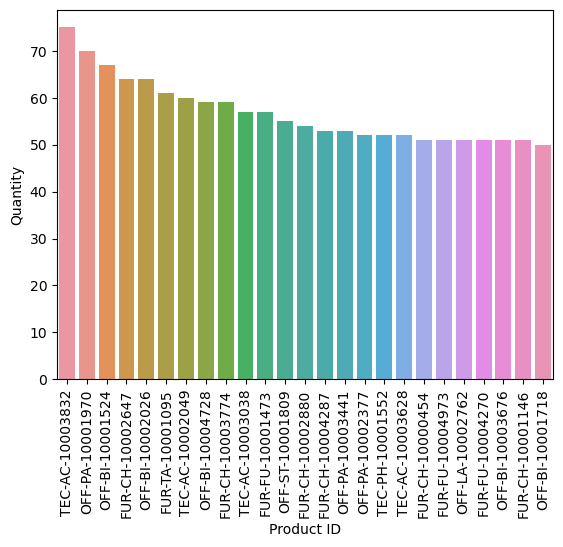

In [20]:
plt = sns.barplot(x= productos['Product ID'][:25], y=productos['Quantity'][:25])

for item in plt.get_xticklabels():
    item.set_rotation(90)
